### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
from google.colab import drive
drive.mount('/content/drive')
prefix = '/content/drive/MyDrive/Colab Notebooks/assignment5_1_starter/'

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [160]:
path = 'data/coupons.csv'
try:
  path = prefix + path
except NameError:
  pass
data = pd.read_csv(path)

2. Investigate the dataset for missing or problematic data.

In [83]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [95]:
data.shape

# Note: original data has 12684 rows and 26 columns

(12684, 26)

In [85]:
data.info()

# Note: car column only has 108 non-null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [86]:
# Investigation:
# Look for unique column values to try to spot duplications, notable
# characteristics, or nonsensical values that can be cleaned (either dropped or # substituted)

for col in data.columns:
    print(f"{col}: {data[col].unique()}")

# Findings and observations:
# 1. age column is notable with 6 discrete ages and then ranges outside min/max
# 2. there are two types of Restaurant coupons that can form a subgroup
# 3. no numerical outliers detected
# 4. income data is already setup into buckets like histogram
# 5. toCoupon_GEQ5min column is all 1's

destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
temperature: [55 80 30]
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children: [1 0]
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Soci

In [96]:
data.isnull().sum()[data.isnull().sum() > 0]

# Note: car column is mostly null entries and the other columns with null data are a small proportion

,0
car,12576
Bar,107
CoffeeHouse,217
CarryAway,151
RestaurantLessThan20,130
Restaurant20To50,189


3. Decide what to do about your missing data -- drop, replace, other...

In [97]:
# rename the dataframe column "passanger" to correct spelling
cleaned_data = data.rename(columns={'passanger': 'passenger'})

# drop the toCoupon_GEQ5min because it's all 1's
cleaned_data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

# delete the column 'car' because it's mostly null and the populated values of the 108 non-null rows are of questionable value
cleaned_data.drop(columns=['car'], inplace=True)

# now that car column is dropped lets drop remaining null rows since it's a small proportion
cleaned_data.dropna(inplace=True)

cleaned_data.shape
# Note: cleaned data has 12079 rows and 24 columns

(12079, 24)

4. What proportion of the total observations chose to accept the coupon?



In [101]:
df = data
acceptance_proportion = df[df['Y'] == 1].shape[0] / df.shape[0]

print(f"Proportion of the total observations that chose to accept the coupon {acceptance_proportion: .4f}")

Proportion of the total observations that chose to accept the coupon  0.5684


5. Use a bar plot to visualize the `coupon` column.

In [181]:
image_path = 'images/'
try:
  image_path = prefix + image_path
except NameError:
  pass

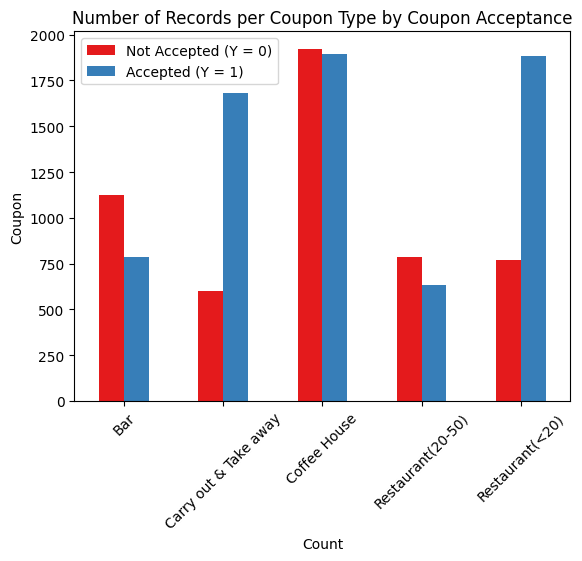

In [204]:
df = cleaned_data
coupon_counts = pd.crosstab(df['coupon'], df['Y'])

# Create grouped bar chart
ax = coupon_counts.plot(
    kind='bar',
    color=sns.color_palette('Set1', 2),
    rot=45,
)

plt.xlabel('Count')
plt.ylabel('Coupon')
plt.title('Number of Records per Coupon Type by Coupon Acceptance')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'coupon_bar_plot.png')
plt.show()

6. Use a histogram to visualize the temperature column.

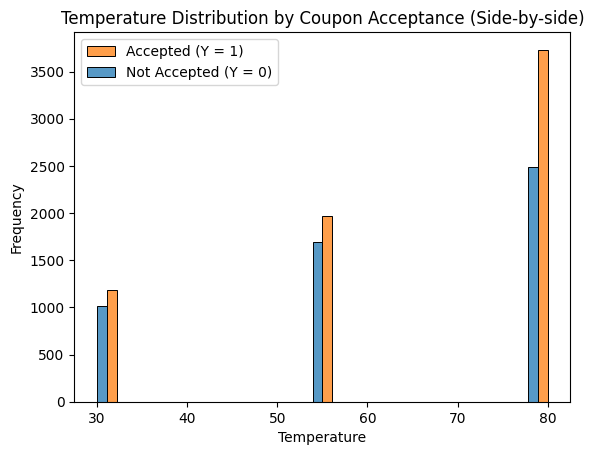

In [203]:
df = cleaned_data
sns.histplot(df, x='temperature', hue='Y', multiple="dodge")
plt.title('Temperature Distribution by Coupon Acceptance (Side-by-side)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['Accepted (Y = 1)', 'Not Accepted (Y = 0)'])
plt.savefig(image_path + 'temp_hist_plot.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.

1. Create a new `DataFrame` that contains just the bar coupons.

In [111]:
bar_coupon_df = cleaned_data[cleaned_data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [113]:
df = bar_coupon_df
bar_coupon_acceptance_proportion = df['Y'].mean()
print(f"Acceptance rate of bar coupon: {bar_coupon_acceptance_proportion:.4f}")

Acceptance rate of bar coupon: 0.4119


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [114]:
df = bar_coupon_df
# Define the two groups based on bar frequency
low_frequency = df[df['Bar'].isin(['never', '1~3', 'less1'])]  # 3 or fewer times
high_frequency = df[df['Bar'].isin(['4~8', 'gt8'])]  # More than 3 times

# Calculate acceptance rates for each group
low_freq_acceptance = low_frequency['Y'].mean()
high_freq_acceptance = high_frequency['Y'].mean()

print(f"Acceptance rate of bar coupon (goes to bar 3 or fewer times per month): {low_freq_acceptance:.4f}")
print(f"Acceptance rate of bar coupon (goes more than 3 times per month): {high_freq_acceptance:.4f}")
print(f"Difference: {high_freq_acceptance - low_freq_acceptance:.4f}")

Acceptance rate of bar coupon (goes to bar 3 or fewer times per month): 0.3727
Acceptance rate of bar coupon (goes more than 3 times per month): 0.7617
Difference: 0.3890


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [115]:
df = bar_coupon_df
# Define the target group: go to bar more than once a month AND over 25
# Adjust these categories based on what you see above
frequent_bar_over25 = df[
    (df['Bar'].isin(['4~8', 'gt8', '1~3'])) &  # More than once a month (adjust as needed)
    (df['age'].isin(['26', '31', '36', '41', '46', '50plus']))  # Over 25
]

# All others (everyone who doesn't meet BOTH criteria)
all_others = df[~df.index.isin(frequent_bar_over25.index)]

# Calculate acceptance rates
target_group_acceptance = frequent_bar_over25['Y'].mean()
others_acceptance = all_others['Y'].mean()

print(f"Acceptance rate of bar coupon (over 25, goes to bar more than once per month): {target_group_acceptance:.4f}")
print(f"Acceptance rate of bar coupon - All others: {others_acceptance:.4f}")
print(f"Difference: {target_group_acceptance - others_acceptance:.4f}")

Acceptance rate of bar coupon (over 25, goes to bar more than once per month): 0.6898
Acceptance rate of bar coupon - All others: 0.3377
Difference: 0.3521


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [116]:
df = bar_coupon_df
frequent_bar_no_kid_passenger_not_farmer_fisher_or_forestry = df[
    (df['Bar'].isin(['4~8', 'gt8', '1~3'])) &  # More than once a month
    (~df['passenger'].isin(['Kid(s)']) & # passenger not a kid
    (~df['occupation'].isin(['farming', 'fishing', 'forestry'])))  # occupations other than farming, fishing, or forestry
]
# All others (everyone who doesn't meet ALL criteria)
all_others = df[~df.index.isin(frequent_bar_no_kid_passenger_not_farmer_fisher_or_forestry.index)]
# Calculate acceptance rates
target_group_acceptance = frequent_bar_no_kid_passenger_not_farmer_fisher_or_forestry['Y'].mean()
others_acceptance = all_others['Y'].mean()

print(f"Acceptance rate of bar coupon (Frequent bar visitors without kid passengers that were not in farming, fishing or forestry occupation): {target_group_acceptance:.4f}")
print(f"Acceptance rate of bar coupon - All others: {others_acceptance:.4f}")
print(f"Difference: {target_group_acceptance - others_acceptance:.4f}")

Acceptance rate of bar coupon (Frequent bar visitors without kid passengers that were not in farming, fishing or forestry occupation): 0.7094
Acceptance rate of bar coupon - All others: 0.2979
Difference: 0.4115


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [117]:
df = bar_coupon_df
criteria_A = df[
    (df['Bar'].isin(['4~8', 'gt8', '1~3'])) &  # More than once a month
    (~df['passenger'].isin(['Kid(s)']) & # passenger not a kid
    (~df['maritalStatus'].isin(['Widowed'])))  # not widowed
]
criteria_B = df[
    (df['Bar'].isin(['4~8', 'gt8', '1~3'])) &  # More than once a month
    (df['age'].isin(['below21', '21', '26'])) # under 30 years old
]
criteria_C = df[
    (df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & # cheap restaurants more than 4 times a month
    (df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) # income less than 50K
]

# Calculate acceptance rates
target_group_A_acceptance = criteria_A['Y'].mean()
target_group_B_acceptance = criteria_B['Y'].mean()
target_group_C_acceptance = criteria_C['Y'].mean()
print(f"Acceptance rates of bar coupon:")
print(f"Frequent bar visitors without kid passengers that were not widowed: {target_group_A_acceptance:.4f}")
print(f"Frequent bar visitors under the age of 30: {target_group_B_acceptance:.4f}")
print(f"Frequent cheap restaurants for than 4x/month with income under $50K: {target_group_C_acceptance:.4f}")


Acceptance rates of bar coupon:
Frequent bar visitors without kid passengers that were not widowed: 0.7094
Frequent bar visitors under the age of 30: 0.7195
Frequent cheap restaurants for than 4x/month with income under $50K: 0.4565


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [118]:
print(f"Hypothesis on acceptance rates of bar coupon:")
print(f"The more frequently a younger, childless driver goes to the bar, the more likely they are to accept the coupon.")

Hypothesis on acceptance rates of bar coupon:
The more frequently a younger, childless driver goes to the bar, the more likely they are to accept the coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [134]:
# Per column acceptance rates:
df = cleaned_data
for col in df.columns:
  if col != 'Y':
    print("\n")
    print(df.groupby(col)['Y'].mean().sort_values(ascending=False))



destination
No Urgent Place    0.634003
Home               0.508266
Work               0.503968
Name: Y, dtype: float64


passenger
Friend(s)    0.676302
Partner      0.594727
Alone        0.527048
Kid(s)       0.496802
Name: Y, dtype: float64


weather
Sunny    0.595042
Snowy    0.476334
Rainy    0.462075
Name: Y, dtype: float64


temperature
80    0.599646
55    0.537138
30    0.537130
Name: Y, dtype: float64


time
2PM     0.660752
10AM    0.607970
6PM     0.582846
10PM    0.515502
7AM     0.503968
Name: Y, dtype: float64


coupon
Carry out & Take away    0.737719
Restaurant(<20)          0.709009
Coffee House             0.496331
Restaurant(20-50)        0.446013
Bar                      0.411918
Name: Y, dtype: float64


expiration
1d    0.627811
2h    0.495018
Name: Y, dtype: float64


gender
Male      0.592347
Female    0.547508
Name: Y, dtype: float64


age
below21    0.632937
26         0.599833
21         0.594009
46         0.576807
41         0.574648
31         0.552208


In [157]:
# Look at combinations
print("Exploring combinations:")
print("\n")
print(df.groupby(['weather', 'time'])['Y'].mean().sort_values(ascending=False).head(10))
print("\n")
print(df.groupby(['gender', 'education'])['Y'].mean().sort_values(ascending=False).head(10))
print("\n")
print(df.groupby(['age', 'coupon'])['Y'].mean().sort_values(ascending=False).head(10))
print("\n")
print(df.groupby(['maritalStatus', 'coupon'])['Y'].mean().sort_values(ascending=False).head(10))

Exploring combinations:


weather  time
Snowy    10AM    0.758621
Sunny    2PM     0.675529
Rainy    2PM     0.650794
Sunny    10AM    0.601545
         6PM     0.599041
         10PM    0.586888
Rainy    10AM    0.557214
         6PM     0.556075
Snowy    2PM     0.540404
Sunny    7AM     0.527585
Name: Y, dtype: float64


gender  education                             
Male    Some High School                          0.750000
Female  Some High School                          0.681818
Male    Some college - no degree                  0.615604
Female  High School Graduate                      0.600877
Male    Associates degree                         0.597077
        High School Graduate                      0.586698
        Bachelors degree                          0.582247
Female  Some college - no degree                  0.573453
Male    Graduate degree (Masters or Doctorate)    0.550000
Female  Bachelors degree                          0.530834
Name: Y, dtype: float64


age      co

In [136]:
df = cleaned_data
# correlation check for numerical only
numerical_cols = df.select_dtypes(include=['int64']).columns
print(df[numerical_cols].corrwith(df['Y']).sort_values(key=abs, ascending=False))

Y                    1.000000
toCoupon_GEQ25min   -0.100542
toCoupon_GEQ15min   -0.081711
temperature          0.056646
has_children        -0.048333
direction_opp       -0.014361
direction_same       0.014361
dtype: float64


                   temperature  has_children  toCoupon_GEQ15min  \
temperature           1.000000     -0.020674          -0.155876   
has_children         -0.020674      1.000000           0.079735   
toCoupon_GEQ15min    -0.155876      0.079735           1.000000   
toCoupon_GEQ25min    -0.215780     -0.014038           0.325558   
direction_same        0.097539     -0.033047          -0.305952   
direction_opp        -0.097539      0.033047           0.305952   
Y                     0.056646     -0.048333          -0.081711   

                   toCoupon_GEQ25min  direction_same  direction_opp         Y  
temperature                -0.215780        0.097539      -0.097539  0.056646  
has_children               -0.014038       -0.033047       0.033047 -0.048333  
toCoupon_GEQ15min           0.325558       -0.305952       0.305952 -0.081711  
toCoupon_GEQ25min           1.000000       -0.192784       0.192784 -0.100542  
direction_same             -0.192784        1.000000      -1.00

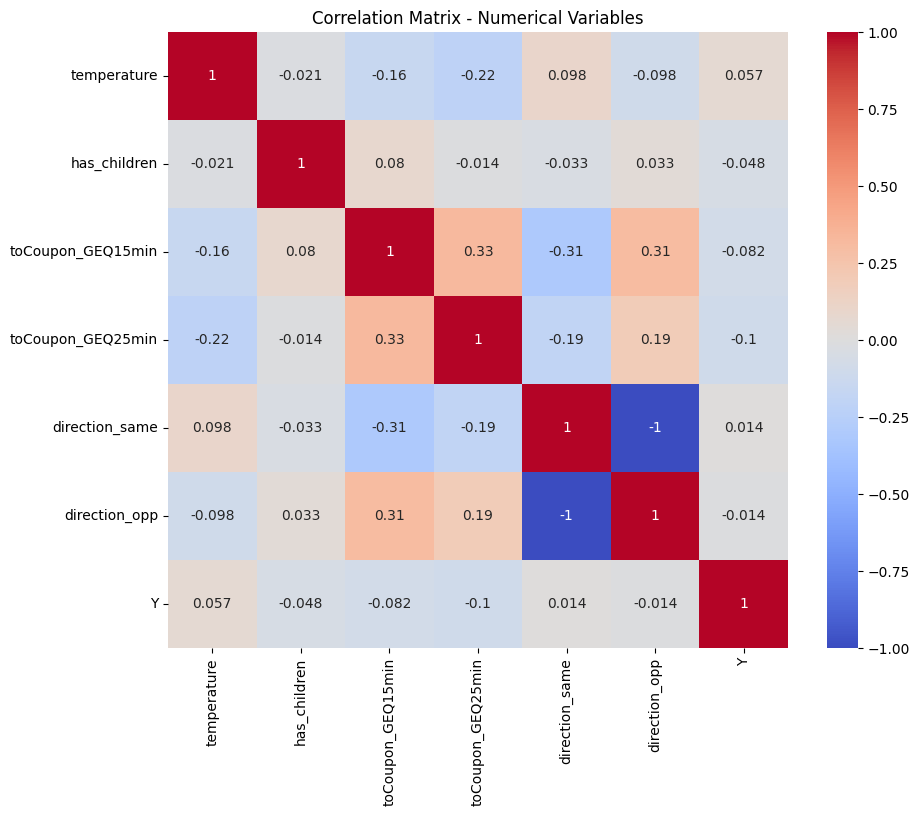

In [202]:
# correlation matrix
df = cleaned_data
numerical_cols = df.select_dtypes(include=['int64']).columns
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# With visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Numerical Variables')
plt.savefig(image_path + 'correlation_matrix.png')
plt.show()

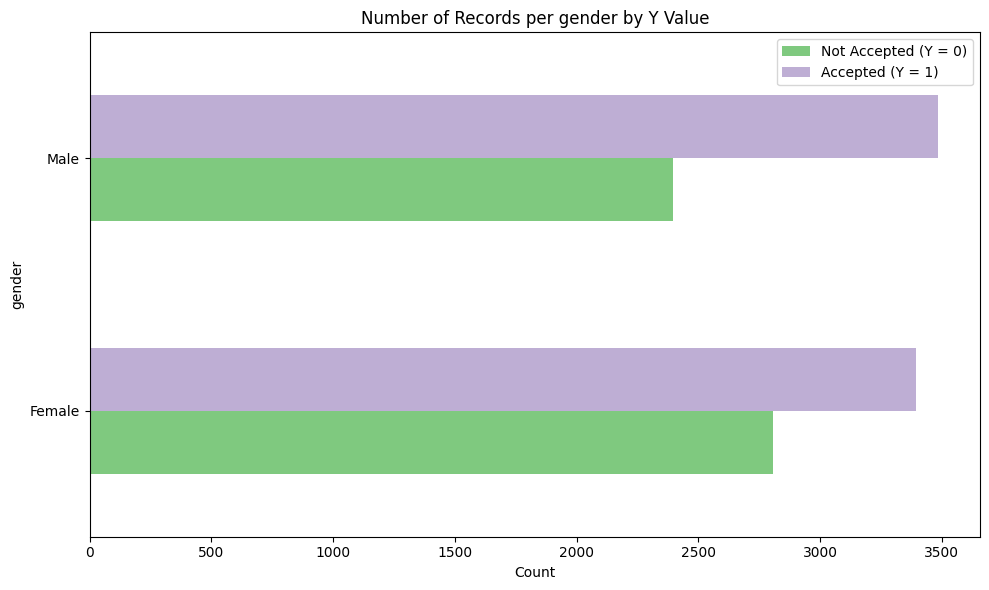

In [201]:
df = cleaned_data
# Create cross-tabulation
counts = pd.crosstab(df['gender'], df['Y'])

# Create grouped bar chart
ax = counts.plot(
    kind='barh',
    color=sns.color_palette('Accent', 2),
    figsize=(10, 6)
)

plt.xlabel('Count')
plt.ylabel('gender')
plt.title('Number of Records per gender by Y Value')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'gender_bar_plot.png')
plt.tight_layout()
plt.show()

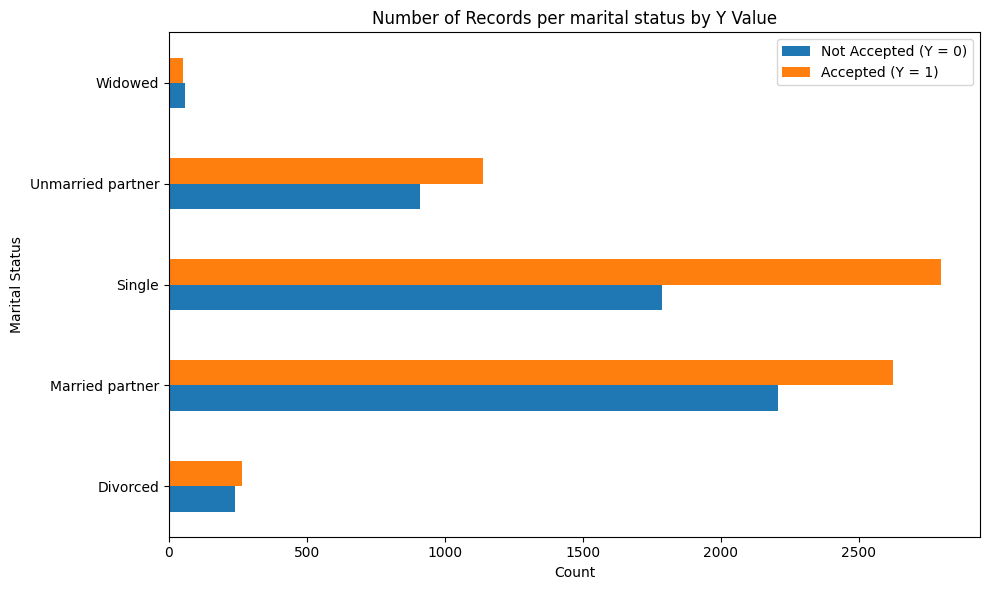

In [200]:
df = cleaned_data

# Create cross-tabulation
counts = pd.crosstab(df['maritalStatus'], df['Y'])

# Create grouped bar chart
ax = counts.plot(
    kind='barh',
    color=sns.color_palette('tab10', 2),
    figsize=(10, 6)
)

plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Number of Records per marital status by Y Value')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'maritalStatus_bar_plot.png')
plt.tight_layout()
plt.show()

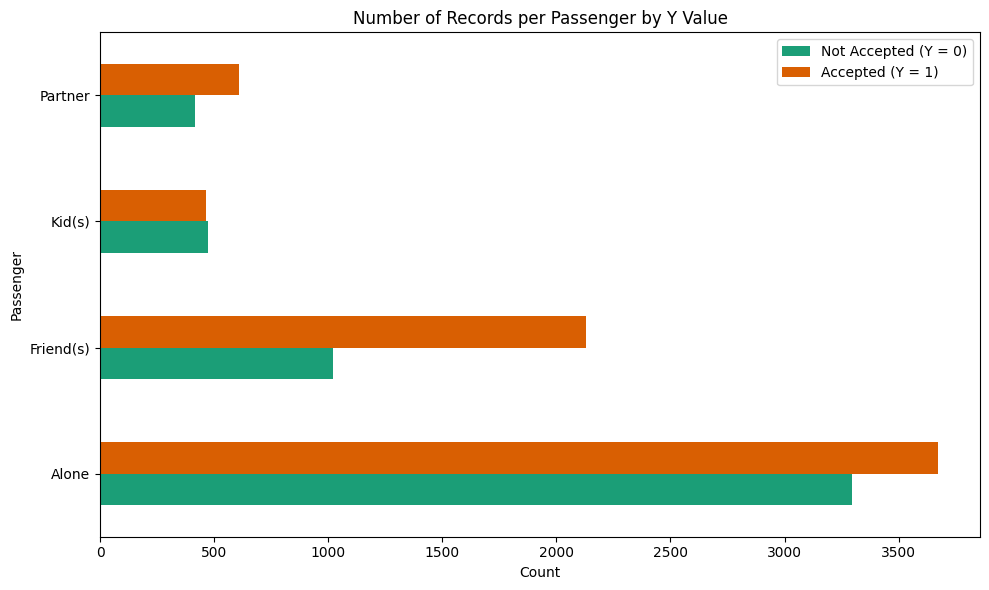

In [199]:
df = cleaned_data
# Create cross-tabulation
passenger_counts = pd.crosstab(df['passenger'], df['Y'])

# Create grouped bar chart
ax = passenger_counts.plot(
    kind='barh',
    color=sns.color_palette('Dark2', 2),
    figsize=(10, 6)
)

plt.xlabel('Count')
plt.ylabel('Passenger')
plt.title('Number of Records per Passenger by Y Value')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'passenger_bar_plot.png')
plt.tight_layout()
plt.show()

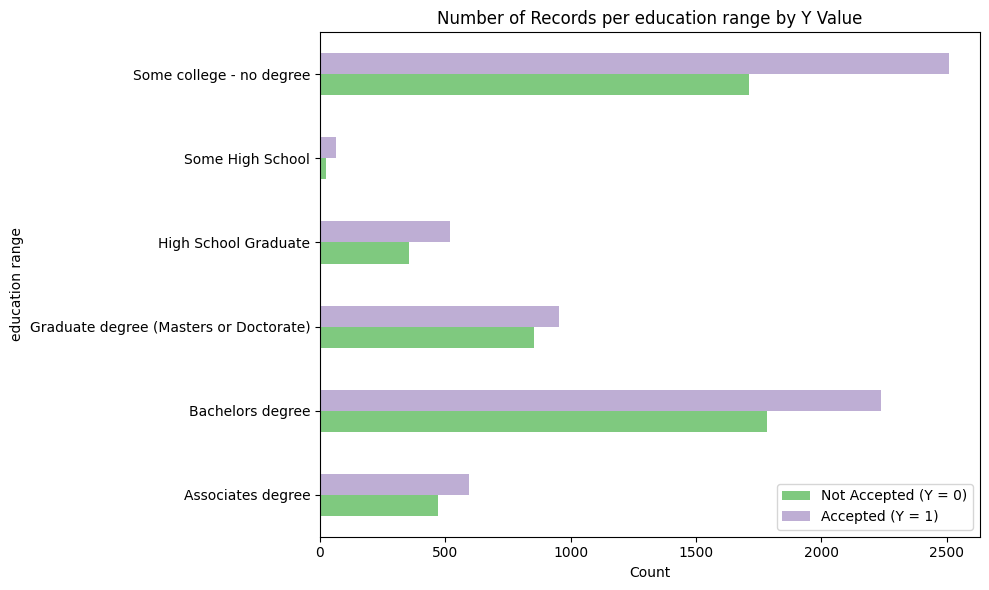

In [198]:
df = cleaned_data
# Create cross-tabulation
counts = pd.crosstab(df['education'], df['Y'])

# Create grouped bar chart
ax = counts.plot(
    kind='barh',
    color=sns.color_palette('Accent', 2),
    figsize=(10, 6)
)

plt.xlabel('Count')
plt.ylabel('education range')
plt.title('Number of Records per education range by Y Value')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'education_bar_plot.png')
plt.tight_layout()
plt.show()

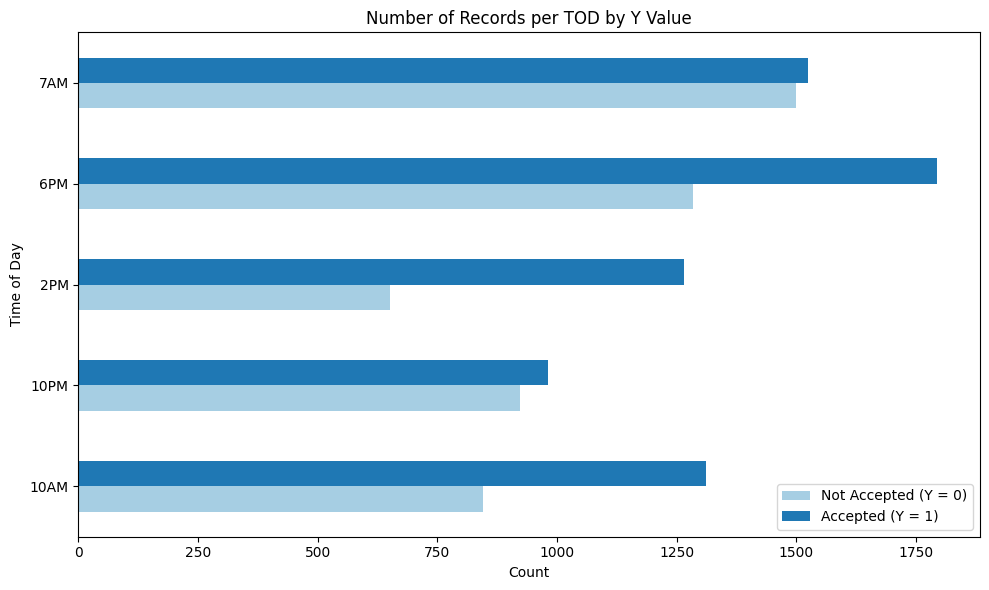

In [197]:
df = cleaned_data
# Create cross-tabulation
timeofday_counts = pd.crosstab(df['time'], df['Y'])

# Create grouped bar chart
ax = timeofday_counts.plot(
    kind='barh',
    color=sns.color_palette('Paired', 2),
    figsize=(10, 6)
)

plt.xlabel('Count')
plt.ylabel('Time of Day')
plt.title('Number of Records per TOD by Y Value')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'time_bar_plot.png')
plt.tight_layout()
plt.show()

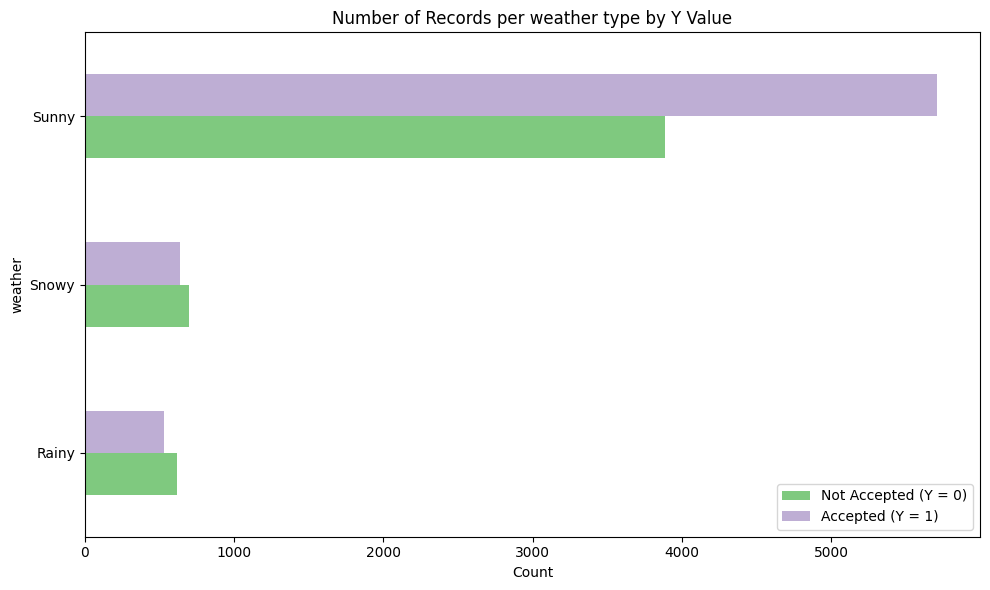

In [196]:
df = cleaned_data
# Create cross-tabulation
counts = pd.crosstab(df['weather'], df['Y'])

# Create grouped bar chart
ax = counts.plot(
    kind='barh',
    color=sns.color_palette('Accent', 2),
    figsize=(10, 6)
)

plt.xlabel('Count')
plt.ylabel('weather')
plt.title('Number of Records per weather type by Y Value')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'weather_bar_plot.png')
plt.tight_layout()
plt.show()

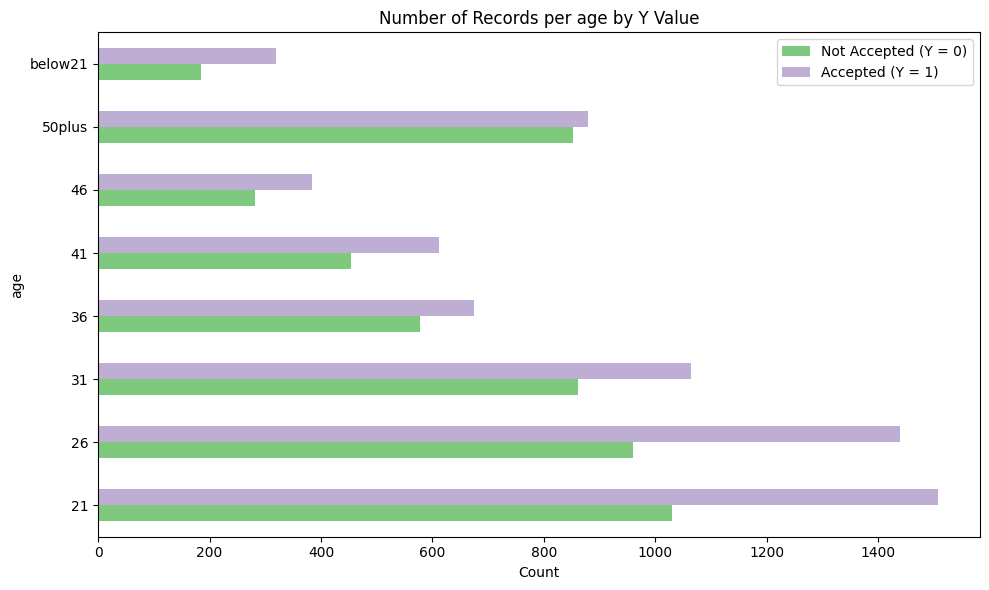

In [195]:
df = cleaned_data
# Create cross-tabulation
counts = pd.crosstab(df['age'], df['Y'])

# Create grouped bar chart
ax = counts.plot(
    kind='barh',
    color=sns.color_palette('Accent', 2),
    figsize=(10, 6)
)

plt.xlabel('Count')
plt.ylabel('age')
plt.title('Number of Records per age by Y Value')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'age_bar_plot.png')
plt.tight_layout()
plt.show()

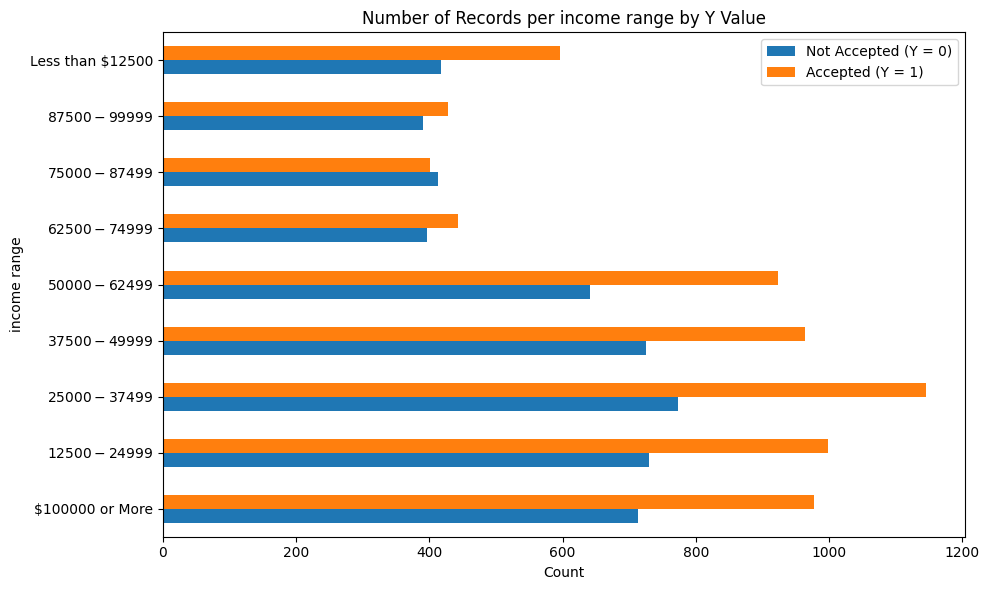

In [194]:
df = cleaned_data
# Create cross-tabulation
counts = pd.crosstab(df['income'], df['Y'])

# Create grouped bar chart
ax = counts.plot(
    kind='barh',
    figsize=(10, 6)
)

plt.xlabel('Count')
plt.ylabel('income range')
plt.title('Number of Records per income range by Y Value')
plt.legend(['Not Accepted (Y = 0)', 'Accepted (Y = 1)'])
plt.savefig(image_path + 'income_bar_plot.png')
plt.tight_layout()
plt.show()